In [615]:
from matplotlib import pyplot as plt
import pickle
import os
from history import History
import pandas as pd
import numpy as np

In [616]:
HISTORY_DIR = "../history"

In [617]:
def create_df_from_history_ins(history_ins: int):
    FILE_PATH = f"{history_ins}_history.pkl"
    history_path = os.path.join(HISTORY_DIR, FILE_PATH)
    with open(history_path, "rb") as f:    
        history = pickle.load(f)
        player_1_reward = history.get("player_1_reward")
        final_state = history.get("final_state")
        done_type = history.get("done_type")
        winner = history.get("winner")

    print(len(player_1_reward), len(final_state), len(done_type), len(winner))

    df = pd.DataFrame({
        "player_1_reward": player_1_reward,
        "final_state": final_state,
        "done_type": done_type,
        "winner": winner
    })
    return df


In [796]:
def display_stats(df: pd.DataFrame, illegal_move_reward = -10):
    winner_stats = df['winner'].value_counts()
    done_type_stats = df['done_type'].value_counts()
    win_percent = round(df[df['winner'] == 1]['winner'].count() / len(df), 3)
    num_illegal_moves = df[df['done_type'] == 'illegal_move']['done_type'].count()
    num_illegal_moves_p1 = df[df['player_1_reward'] == illegal_move_reward]['player_1_reward'].count()
    percent_of_illegal_moves = round(num_illegal_moves_p1 / num_illegal_moves, 3) * 100
    percent_illegal_moves = round(num_illegal_moves / len(df), 3)
    win_percent_wo_illegal = round(df[df['winner'] == 1]['winner'].count() / len(df[df['done_type'] != 'illegal_move']), 3)
    vertical_wins = df[(df['winner'] == 1) & (df['done_type'] == 'vertical')]['winner'].count()
    vertical_wins_percent = round(vertical_wins / len(df[df['winner'] == 1]), 3)
    print(f"Winner stats:\n{winner_stats}\n")
    print(f"Done type stats:\n{done_type_stats}\n")
    print(f"Win percent:\n{win_percent}\n")
    print(f"Win percent without illegal moves:\n{win_percent_wo_illegal}\n")
    print(f"Number of illegal moves by Player 1:\n{num_illegal_moves_p1} = {percent_of_illegal_moves}% = {percent_illegal_moves} of total endings\n")
    print(f"Vertical wins:\n{vertical_wins} = {vertical_wins_percent}%\n")


# Training agent against random agent for 300 episodes

In [797]:
df = create_df_from_history_ins(6)
df2 = df.drop(columns=['final_state'])
display_stats(df2)

dict_keys(['player_1_reward', 'winner', 'done_type', 'final_state', 'loss'])


KeyError: 'game_length'

Most of all the wins are **vertical wins**

Still a lot of **illegal_moves** -> Hasn't learned to not play correctly, migth be player_2

In [619]:
df2['done_type'].value_counts()

vertical         298
illegal_moves     89
horizontal        51
diagonal          12
Name: done_type, dtype: int64

Agent 1, who also starts, wins 54.3% of the games not being ended due to illegal_moves

In [620]:
print(df2['winner'].value_counts())
win_percent = df2['winner'].value_counts() / (len(df2) - len(df2[df['done_type'] == 'illegal_moves']))
win_percent

1    196
2    165
0     89
Name: winner, dtype: int64


1    0.542936
2    0.457064
0    0.246537
Name: winner, dtype: float64

40 of the 89 *illegal_moves*, 45%, are done by player 1.

In [621]:
illegal = df2[(df2['done_type'] == 'illegal_moves') & (df2['player_1_reward'] == -1)].count()
illegal_percent = illegal / len(df2[df2['done_type'] == 'illegal_moves'])
print(illegal)
illegal_percent


player_1_reward    40
done_type          40
winner             40
dtype: int64


player_1_reward    0.449438
done_type          0.449438
winner             0.449438
dtype: float64

# Run 1000 episodes w/training_agent starting with weights main_6_200 and opponent main_6_100

In [622]:
history_instance = 7
df = create_df_from_history_ins(history_instance)
df2 = df.drop(columns=['final_state'])

1100 1100 1100 1100


In [623]:
df2['done_type'].value_counts()

vertical         735
horizontal       168
illegal_moves    155
diagonal          42
Name: done_type, dtype: int64

In [624]:
print(df2['winner'].value_counts())
win_percent = df2['winner'].value_counts() / (len(df2) - len(df2[df['done_type'] == 'illegal_moves']))
win_percent

1    554
2    391
0    155
Name: winner, dtype: int64


1    0.586243
2    0.413757
0    0.164021
Name: winner, dtype: float64

Player 1 only made 40% of the illegal_moves

In [625]:
illegal = df2[(df2['done_type'] == 'illegal_moves') & (df2['player_1_reward'] == -1)].count()
illegal_percent = illegal / len(df2[df2['done_type'] == 'illegal_moves'])
print(illegal)
illegal_percent


player_1_reward    63
done_type          63
winner             63
dtype: int64


player_1_reward    0.406452
done_type          0.406452
winner             0.406452
dtype: float64

In [626]:
df2[['player_1_reward']].value_counts()

player_1_reward
 1                 554
-1                 454
 0                  92
dtype: int64

# 3000 episodes, opponent starts with policy 900 episodes prior

In [627]:
history_instance = 8
df = create_df_from_history_ins(history_instance)
df2 = df.drop(columns=['final_state'])

3110 3110 3110 3110


In [628]:
df2['done_type'].value_counts()

vertical         2375
illegal_moves     360
horizontal        335
diagonal           40
Name: done_type, dtype: int64

In [629]:
print(df2['winner'].value_counts())
win_percent = df2['winner'].value_counts() / (len(df2) - len(df2[df['done_type'] == 'illegal_moves']))
win_percent

1    2194
2     556
0     360
Name: winner, dtype: int64


1    0.797818
2    0.202182
0    0.130909
Name: winner, dtype: float64

In [630]:
illegal = df2[(df2['done_type'] == 'illegal_moves') & (df2['player_1_reward'] == -1)].count()
illegal_percent = illegal / len(df2[df2['done_type'] == 'illegal_moves'])
print(illegal)
illegal_percent


player_1_reward    175
done_type          175
winner             175
dtype: int64


player_1_reward    0.486111
done_type          0.486111
winner             0.486111
dtype: float64

# Test 500 episodes against random agent

In [631]:
history_instance = 9
df = create_df_from_history_ins(history_instance)
df2 = df.drop(columns=['final_state'])

100 100 100 100


In [632]:
df2['done_type'].value_counts()

vertical         50
horizontal       24
diagonal         17
illegal_moves     9
Name: done_type, dtype: int64

The trained agent wins 82.5% of the times against the random agent

In [633]:
print(df2['winner'].value_counts())
win_percent = df2['winner'].value_counts() / (len(df2) - len(df2[df['done_type'] == 'illegal_moves']))
win_percent

1    55
2    36
0     9
Name: winner, dtype: int64


1    0.604396
2    0.395604
0    0.098901
Name: winner, dtype: float64

# Training agent for 1000 episodes

In [634]:
df = create_df_from_history_ins(10)
df2 = df.drop(columns=['final_state'])

1100 1100 1100 1100


In [635]:
df2['done_type'].value_counts()

vertical         891
illegal_moves     92
horizontal        70
diagonal          47
Name: done_type, dtype: int64

In [636]:
print(df2['winner'].value_counts())
win_percent = df2['winner'].value_counts() / (len(df2) - len(df2[df['done_type'] == 'illegal_moves']))
win_percent

1    820
2    188
0     92
Name: winner, dtype: int64


1    0.813492
2    0.186508
0    0.091270
Name: winner, dtype: float64

In [637]:
illegal = df2[(df2['done_type'] == 'illegal_moves') & (df2['player_1_reward'] == -1)].count()
illegal_percent = illegal / len(df2[df2['done_type'] == 'illegal_moves'])
print(illegal)
illegal_percent

player_1_reward    42
done_type          42
winner             42
dtype: int64


player_1_reward    0.456522
done_type          0.456522
winner             0.456522
dtype: float64

The agent seems to overfit to only trying vertical wins. Change the rewards

# Changed agent rewards to restrict vertical wins and illegal moves

In [638]:
df = create_df_from_history_ins(11)
df2 = df.drop(columns=['final_state'])

2100 2100 2100 2100


In [639]:
df2['done_type'].value_counts()

vertical         1975
illegal_moves      51
horizontal         47
diagonal           27
Name: done_type, dtype: int64

Agent wins 96% of all the games against a prior policy of itself. Almost all are vertical, despite try to increase horizontal/diagonal wins

In [640]:
print(df2['winner'].value_counts())
win_percent = df2['winner'].value_counts() / (len(df2) - len(df2[df['done_type'] == 'illegal_moves']))
win_percent

1    1972
2      77
0      51
Name: winner, dtype: int64


1    0.962421
2    0.037579
0    0.024890
Name: winner, dtype: float64

### Never choose illegal_moves > 1 time!
It seems as if the agent has learned not to choose illegal moves > 1 time

In [641]:
illegal_move_reward = -5
df2[(df2['done_type'] == 'illegal_moves') & (df2['player_1_reward'] <= illegal_move_reward)]

,player_1_reward,done_type,winner


# Agent trained on a opponent lagging 2 * 300 episodes behind for 3000 episodes

In [642]:
df = create_df_from_history_ins(12)
df2 = df.drop(columns=['final_state'])

3200 3200 3200 3200


In [643]:
df2['done_type'].value_counts()

vertical         1919
illegal_moves     740
horizontal        377
diagonal          164
Name: done_type, dtype: int64

In [644]:
print(df2['winner'].value_counts())
win_percent = df2['winner'].value_counts() / (len(df2) - len(df2[df['done_type'] == 'illegal_moves']))
win_percent

1    1572
2     888
0     740
Name: winner, dtype: int64


1    0.639024
2    0.360976
0    0.300813
Name: winner, dtype: float64

In [645]:
illegal_move_reward = -5
df2[df2['player_1_reward'] <= -1]

,player_1_reward,done_type,winner
1,-1.0,diagonal,2
2,-1.0,horizontal,2
3,-1.0,vertical,2
8,-1.0,vertical,2
11,-1.0,diagonal,2
...,...,...,...
3018,-1.0,vertical,2
3021,-1.0,vertical,2
3045,-1.0,vertical,2
3048,-1.0,vertical,2


In [646]:
# Get the average reward
df2['player_1_reward'].mean()

0.214765625

# ~15000 episodes with opponent lagging 3 policies behind
Because I had to abort the training and had falsy added history-checkpoint, the history's corrupted. Instead I tested the agent against a random player for 600 episodes

In [647]:
df = create_df_from_history_ins(14)
df2 = df.drop(columns=['final_state'])

610 610 610 610


In [648]:
df2['done_type'].value_counts()

vertical         404
illegal_moves    148
horizontal        36
diagonal          22
Name: done_type, dtype: int64

In [649]:
print(df2['winner'].value_counts())
win_percent = df2['winner'].value_counts() / (len(df2) - len(df2[df['done_type'] == 'illegal_moves']))
win_percent

1    402
0    148
2     60
Name: winner, dtype: int64


1    0.870130
0    0.320346
2    0.129870
Name: winner, dtype: float64

In [650]:
illegal_move_reward = -5
df2[df2['player_1_reward'] <= illegal_move_reward]

,player_1_reward,done_type,winner


# Trained agent for ~4000 episodes after fixing illegal_action-reward
Vertical victory is also reduced to a reward of 0.5, instead of 0.75

In [795]:
df = create_df_from_history_ins(15)
df2 = df.drop(columns=['final_state'])
display_stats(df2)

dict_keys(['player_1_reward', 'winner', 'done_type', 'final_state', 'game_length', 'loss'])
3760 3760 3760 3760
Winner stats:
1    1660
2    1505
0     595
Name: winner, dtype: int64

Done type stats:
vertical        2266
horizontal       774
illegal_move     595
diagonal         125
Name: done_type, dtype: int64

Win percent:
0.441

Win percent without illegal moves:
0.524

Number of illegal moves by Player 1:
0 = 0.0% = 0.158 of total endings

Vertical wins:
1187 = 0.715%



In [652]:
df2['done_type'].value_counts()

vertical        2266
horizontal       774
illegal_move     595
diagonal         125
Name: done_type, dtype: int64

Kept training the agent for ~6200 more episodes

In [653]:
df = create_df_from_history_ins(16)
df2 = df.drop(columns=['final_state'])

6200 6200 6200 6200


There is an increase in horizontal wins, but vertical's still superior

In [654]:
df2['done_type'].value_counts()

vertical        4317
illegal_move    1103
horizontal       722
diagonal          58
Name: done_type, dtype: int64

In [655]:
print(df2['winner'].value_counts())
win_percent = df2['winner'].value_counts() / (len(df2) - len(df2[df['done_type'] == 'illegal_move']))
win_percent

2    2781
1    2316
0    1103
Name: winner, dtype: int64


2    0.545615
1    0.454385
0    0.216402
Name: winner, dtype: float64

336 illegal moves, not good

In [656]:
illegal_move_reward = -5
df2[df2['player_1_reward'] <= illegal_move_reward].count()

player_1_reward    336
done_type          336
winner             336
dtype: int64

Although the results doesn't seem that good, it's a lot better when you play against it than before! Let's try it against a random agent

In [657]:
df = create_df_from_history_ins(17)
df2 = df.drop(columns=['final_state'])

610 610 610 610


In [658]:
df2['done_type'].value_counts()

vertical        352
horizontal      142
illegal_move     79
diagonal         37
Name: done_type, dtype: int64

In [659]:
print(df2['winner'].value_counts())
win_percent = df2['winner'].value_counts() / (len(df2) - len(df2[df['done_type'] == 'illegal_move']))
win_percent

1    341
2    190
0     79
Name: winner, dtype: int64


1    0.642185
2    0.357815
0    0.148776
Name: winner, dtype: float64

The trained agent only wins 56% of the games against the random agent. Does it do better against an earlier version of itself? This might have been with weight_13 and not weight_14 as wanted

# Trained overnight with same setup as over

In [660]:
df = create_df_from_history_ins(18)
df2 = df.drop(columns=['final_state'])

24500 24500 24500 24500


In [661]:
df2['done_type'].value_counts()

vertical        20701
illegal_move     3113
horizontal        634
diagonal           52
Name: done_type, dtype: int64

In [662]:
print(df2['winner'].value_counts())
win_percent = df2['winner'].value_counts() / (len(df2) - len(df2[df['done_type'] == 'illegal_move']))
win_percent

1    13379
2     8008
0     3113
Name: winner, dtype: int64


1    0.625567
2    0.374433
0    0.145556
Name: winner, dtype: float64

The agent unfortunately overfits to the vertical strategy, it doesn't seem to have learned that it shouldn't take illegal moves neither.
Training a new agent from scratch. Increasing the depth with 1 dense layer. Removing the possibility to choose a wrong action once -> Directly ends if wrong is chosen

# Agent with Conv2D-input layer and illegal_move threshold of 0
6200 episodes

In [663]:
def create_df_from_history_ins(history_ins: int):
    FILE_PATH = f"{history_ins}_history.pkl"
    history_path = os.path.join(HISTORY_DIR, FILE_PATH)
    history = None
    with open(history_path, "rb") as f:
        history = pickle.load(f)

    print(history.history.keys())
    player_1_reward = history.get("player_1_reward")
    final_state = history.get("final_state")
    done_type = history.get("done_type")
    winner = history.get("winner")
    game_length = history.get("game_length")

    print(len(player_1_reward), len(final_state), len(done_type), len(winner))

    df = pd.DataFrame({
        "player_1_reward": player_1_reward,
        "final_state": final_state,
        "done_type": done_type,
        "winner": winner,
        "game_length": game_length
    })
    return df


In [766]:
def display_stats(df: pd.DataFrame, illegal_move_reward = -10):
    winner_stats = df['winner'].value_counts()
    done_type_stats = df['done_type'].value_counts()
    win_percent = round(df[df['winner'] == 1]['winner'].count() / len(df), 3)
    num_illegal_moves = df[df['done_type'] == 'illegal_move']['done_type'].count()
    num_illegal_moves_p1 = df[df['player_1_reward'] == illegal_move_reward]['player_1_reward'].count()
    percent_of_illegal_moves = round(num_illegal_moves_p1 / num_illegal_moves, 3) * 100
    percent_illegal_moves = round(num_illegal_moves / len(df), 3)
    win_percent_wo_illegal = round(df[df['winner'] == 1]['winner'].count() / len(df[df['done_type'] != 'illegal_move']), 3)
    vertical_wins = df[(df['winner'] == 1) & (df['done_type'] == 'vertical')]['winner'].count()
    vertical_wins_percent = round(vertical_wins / len(df[df['winner'] == 1]), 3)
    print(f"Winner stats:\n{winner_stats}\n")
    print(f"Done type stats:\n{done_type_stats}\n")
    print(f"Win percent:\n{win_percent}\n")
    print(f"Win percent without illegal moves:\n{win_percent_wo_illegal}\n")
    print(f"Number of illegal moves by Player 1:\n{num_illegal_moves_p1} = {percent_of_illegal_moves}% = {percent_illegal_moves} of total endings\n")
    print(f"Vertical wins:\n{vertical_wins} = {vertical_wins_percent}%\n")


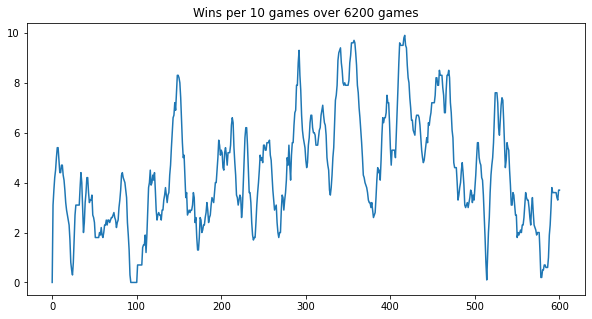

In [767]:
def calculate_wins_window(df: pd.DataFrame, window: int = 10, winner = 1):
    wins = []
    curr_sum = 0
    for index,row in df.iterrows():        
        if row['winner'] == winner:
            curr_sum += 1
        
        if index % window == 0:
            wins.append(curr_sum)
            curr_sum = 0

    # Smooth the plot
    wins = wins[window:]
    wins = [sum(wins[i:i+window]) / window for i in range(len(wins) - window)]
    wins = [0] + wins
    return wins


def plot_wins_window(wins = None, df: pd.DataFrame = None, window: int = 10, epoch_length: int = 0, winner=1):
    if wins is None:
        wins = calculate_wins_window(df, window, winner)

    plt.figure(figsize=(10,5))
    plt.title(f"Wins per {window} games over {len(df)} games")
    plt.plot(wins)
    plt.show()

plot_wins_window(df=df, window=10)

In [768]:
df = create_df_from_history_ins(19)
df2 = df.drop(columns=['final_state'])

dict_keys(['player_1_reward', 'winner', 'done_type', 'final_state', 'game_length', 'loss'])
6200 6200 6200 6200


In [769]:
display_stats(df, illegal_move_reward = -5)

Winner stats:
1    2751
2    2500
0     949
Name: winner, dtype: int64

Done type stats:
vertical        4199
illegal_move     949
horizontal       861
diagonal         191
Name: done_type, dtype: int64

Win percent:
0.444

Win percent without illegal moves:
0.524

Number of illegal moves by Player 1:
305 = 32.1% = 0.153 of total endings

Vertical wins:
2057 = 0.748%



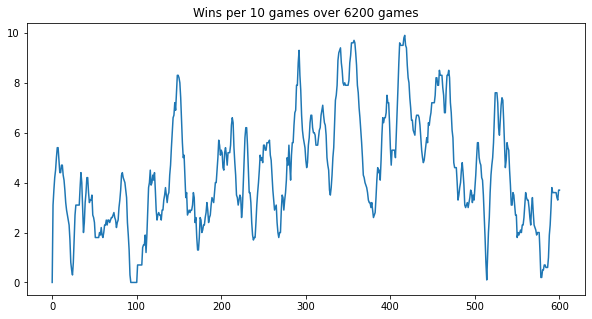

In [770]:
plot_wins_window(df=df, window=10)

305 illegal moves.
Although the agent's history doesn't look very good, it seems to not have overfitted to one strategy, when played against. Let's try it against a random agent

dict_keys(['player_1_reward', 'winner', 'done_type', 'final_state', 'game_length'])
610 610 610 610
Winner stats:
1    364
0    145
2    101
Name: winner, dtype: int64

Done type stats:
vertical        358
illegal_move    145
horizontal       79
diagonal         28
Name: done_type, dtype: int64

Win percent:
0.597

Win percent without illegal moves:
0.783

Number of illegal moves by Player 1:
86 = 59.3% = 0.238 of total endings

Vertical wins:
305 = 0.838%



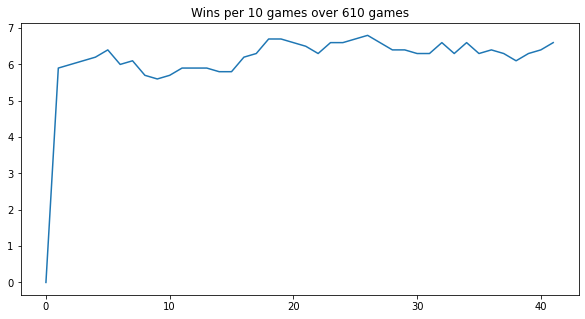

In [771]:
df = create_df_from_history_ins(20)
display_stats(df, illegal_move_reward = -5)
plot_wins_window(df=df, window=10)

Wins 78% of the games against the random agent.

# Conv2D Agent with harder illegal_move penalty
An idea would also be to penalize the agent for not placing winning coin, when it has the opportunity

dict_keys(['player_1_reward', 'winner', 'done_type', 'final_state', 'game_length', 'loss'])
13060 13060 13060 13060
Winner stats:
1    6275
2    5082
0    1703
Name: winner, dtype: int64

Done type stats:
vertical        9239
horizontal      1814
illegal_move    1703
diagonal         304
Name: done_type, dtype: int64

Win percent:
0.48

Win percent without illegal moves:
0.553

Number of illegal moves by Player 1:
803 = 47.199999999999996% = 0.13 of total endings

Vertical wins:
4720 = 0.752%



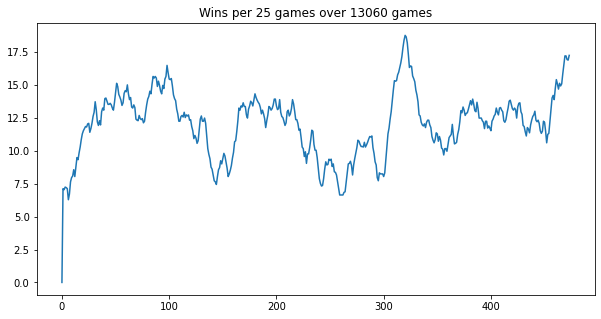

In [772]:
df = create_df_from_history_ins(21)
display_stats(df, illegal_move_reward = -10)
plot_wins_window(df=df, window=25)

In [773]:
df[(df['winner'] == 1) & (df['game_length'] > 16)]['final_state'][4203]

array([[0, 2, 0, 1, 0, 0, 0],
       [2, 2, 0, 1, 1, 2, 2],
       [1, 1, 0, 1, 1, 2, 2],
       [2, 2, 1, 2, 1, 1, 1],
       [2, 1, 2, 1, 2, 1, 2],
       [1, 1, 1, 2, 2, 1, 2]])

The agent plays pretty well. It rarely places a coin outside of the board. It misses a lot of possible wins, try to introduce a reward for that. First test it against a random agent

dict_keys(['player_1_reward', 'winner', 'done_type', 'final_state', 'game_length'])
610 610 610 610
Winner stats:
1    336
2    161
0    113
Name: winner, dtype: int64

Done type stats:
vertical        319
horizontal      155
illegal_move    113
diagonal         23
Name: done_type, dtype: int64

Win percent:
0.551

Win percent without illegal moves:
0.676

Number of illegal moves by Player 1:
33 = 29.2% = 0.185 of total endings

Vertical wins:
266 = 0.792%



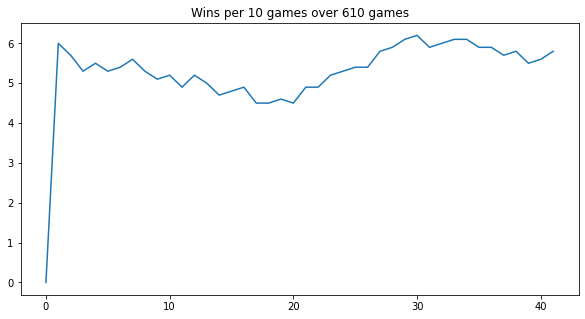

In [774]:
df = create_df_from_history_ins(22)
display_stats(df, illegal_move_reward = -10)
plot_wins_window(df=df, window=10)

# Train Agent 
Increase min_epsilon to 5%

dict_keys(['player_1_reward', 'winner', 'done_type', 'final_state', 'game_length', 'loss'])
7420 7420 7420 7420
Winner stats:
1    3167
2    3135
0    1118
Name: winner, dtype: int64

Done type stats:
vertical        5359
illegal_move    1118
horizontal       813
diagonal         130
Name: done_type, dtype: int64

Win percent:
0.427

Win percent without illegal moves:
0.503

Number of illegal moves by Player 1:
442 = 39.5% = 0.151 of total endings

Vertical wins:
2442 = 0.771%



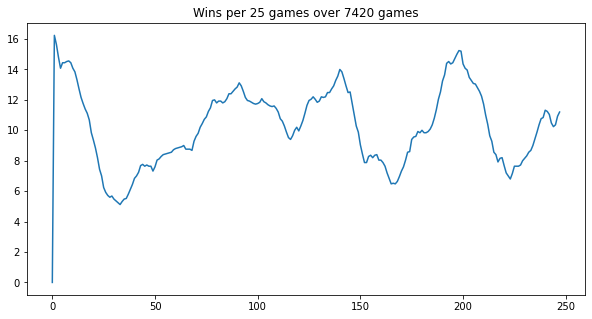

In [775]:
df = create_df_from_history_ins(23)
display_stats(df, illegal_move_reward = -10)
plot_wins_window(df=df, window=25)

Tested against a random agent:

In [776]:
df = create_df_from_history_ins(24)
display_stats(df, illegal_move_reward = -10)

dict_keys(['player_1_reward', 'winner', 'done_type', 'final_state', 'game_length'])
610 610 610 610
Winner stats:
1    399
2    119
0     92
Name: winner, dtype: int64

Done type stats:
vertical        437
illegal_move     92
horizontal       68
diagonal         13
Name: done_type, dtype: int64

Win percent:
0.654

Win percent without illegal moves:
0.77

Number of illegal moves by Player 1:
49 = 53.300000000000004% = 0.151 of total endings

Vertical wins:
394 = 0.987%



# Change the activation-function for output-layer
I previously used softmax, which should primarily be used for multi-class classification problems

In [777]:
df = create_df_from_history_ins(25)
display_stats(df, illegal_move_reward = -10)
plot_wins_window(df, 10)

dict_keys(['player_1_reward', 'winner', 'done_type', 'final_state', 'game_length', 'loss'])
1720 1720 1720 1720
Winner stats:
1    1283
2     313
0     124
Name: winner, dtype: int64

Done type stats:
vertical        1394
horizontal       183
illegal_move     124
diagonal          19
Name: done_type, dtype: int64

Win percent:
0.746

Win percent without illegal moves:
0.804

Number of illegal moves by Player 1:
108 = 87.1% = 0.072 of total endings

Vertical wins:
1169 = 0.911%



TypeError: object of type 'int' has no len()

<Figure size 720x360 with 0 Axes>

dict_keys(['player_1_reward', 'winner', 'done_type', 'final_state', 'game_length'])
810 810 810 810
Winner stats:
1    595
0    209
2      6
Name: winner, dtype: int64

Done type stats:
vertical        597
illegal_move    209
horizontal        4
Name: done_type, dtype: int64

Win percent:
0.735

Win percent without illegal moves:
0.99

Number of illegal moves by Player 1:
185 = 88.5% = 0.258 of total endings

Vertical wins:
595 = 1.0%



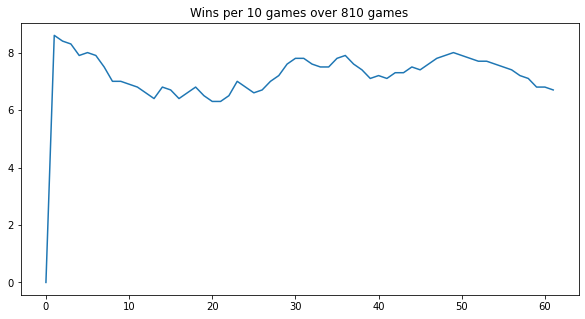

In [778]:
df = create_df_from_history_ins(26)
display_stats(df, illegal_move_reward = -10)
plot_wins_window(df=df, window=10)

In [779]:
df = create_df_from_history_ins(27)
display_stats(df, illegal_move_reward = -10)

dict_keys(['player_1_reward', 'winner', 'done_type', 'final_state', 'game_length', 'opponent_policy', 'loss'])
9010 9010 9010 9010
Winner stats:
1    4198
2    3718
0    1094
Name: winner, dtype: int64

Done type stats:
vertical        7554
illegal_move    1094
horizontal       308
diagonal          54
Name: done_type, dtype: int64

Win percent:
0.466

Win percent without illegal moves:
0.53

Number of illegal moves by Player 1:
421 = 38.5% = 0.121 of total endings

Vertical wins:
3863 = 0.92%



In [780]:
window_size = 10

def plot_wins_with_epochs(wins, n_episodes, opponent_lag, window_size):
    epochs = len(df) // n_episodes
    n_policy_changes = (epochs // opponent_lag)
    epoch_list = np.array([i * n_episodes for i in range(1, epochs)])
    policy_changes = np.array([n_episodes * opponent_lag * i for i in range(1, n_policy_changes + 1)])
    epoch_list_windowed = epoch_list / window_size
    policy_changes_windowed = policy_changes / window_size

    plt.figure(figsize=(10,5))
    plt.vlines(x=epoch_list_windowed, ymin=[0], ymax=[window_size], colors='teal', ls='--', lw=1, label='vline_multiple - partial height')
    plt.vlines(x=policy_changes_windowed, ymin=[0], ymax=[window_size], colors='orange', ls='--', lw=2, label='vline_multiple - partial height')
    plt.plot(wins)
    plt.show()
    # return epoch_list_windowed, policy_changes_windowed

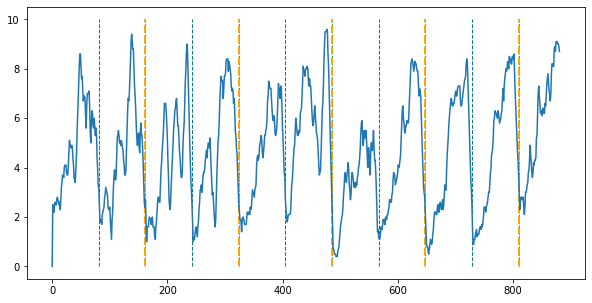

In [781]:

wins = calculate_wins_window(df, window=window_size)
plot_wins_with_epochs(wins, 810, 2, window_size)


# New run
The agent still severly overfits to othe strategy of vertical wins. 
- Increase the reward of horizontal/diagonal wins
- Increase the episodes from 810 to 1610 in order to see if the wins keep climbing

dict_keys(['player_1_reward', 'winner', 'done_type', 'final_state', 'game_length', 'opponent_policy', 'loss'])
10150 10150 10150 10150
Winner stats:
1    5993
0    2181
2    1976
Name: winner, dtype: int64

Done type stats:
vertical        7839
illegal_move    2181
horizontal       127
diagonal           3
Name: done_type, dtype: int64

Win percent:
0.59

Win percent without illegal moves:
0.752

Number of illegal moves by Player 1:
161 = 7.3999999999999995% = 0.215 of total endings

Vertical wins:
5866 = 0.979%



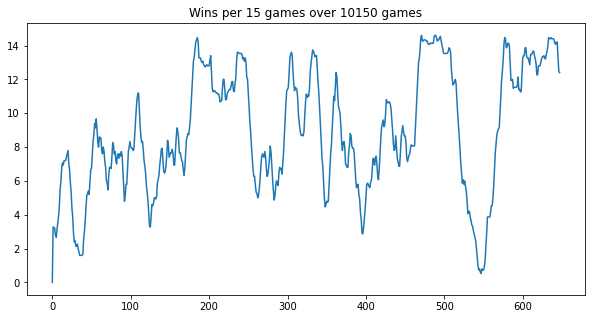

In [782]:
window_size = 15
df = create_df_from_history_ins(28)
display_stats(df, illegal_move_reward = -10)
plot_wins_window(df=df, window=window_size)
# plot_wins_with_epochs(wins, 2010, 1, window_size)

Tested against a random agent

dict_keys(['player_1_reward', 'winner', 'done_type', 'final_state', 'game_length', 'opponent_policy'])
810 810 810 810
Winner stats:
1    678
0    100
2     32
Name: winner, dtype: int64

Done type stats:
vertical        685
illegal_move    100
horizontal       24
diagonal          1
Name: done_type, dtype: int64

Win percent:
0.837

Win percent without illegal moves:
0.955

Number of illegal moves by Player 1:
63 = 63.0% = 0.123 of total endings

Vertical wins:
678 = 1.0%



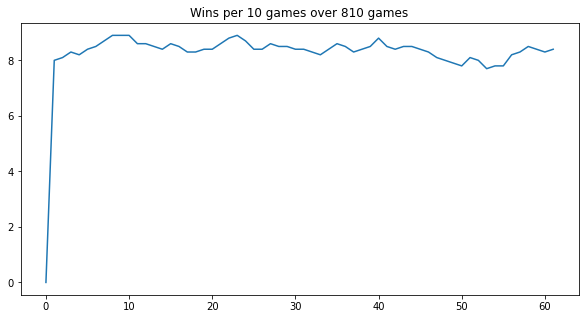

In [783]:
window_size = 10
df = create_df_from_history_ins(29)
display_stats(df, illegal_move_reward = -10)
plot_wins_window(df=df, window=window_size)

# Trained overnight
- Opponent also uses an annealing epsilon for choosing actions
- The opponent's policy is randomly chosen between the 5 actions in the PolicyNetwork
- Increase the exploration by slowing the decrease of epsilon


dict_keys(['player_1_reward', 'winner', 'done_type', 'final_state', 'game_length', 'opponent_policy', 'loss'])
6130 6130 6130 6130
Winner stats:
1    4186
2    1080
0     864
Name: winner, dtype: int64

Done type stats:
vertical        4903
illegal_move     864
horizontal       260
diagonal         103
Name: done_type, dtype: int64

Win percent:
0.683

Win percent without illegal moves:
0.795

Number of illegal moves by Player 1:
169 = 19.6% = 0.141 of total endings

Vertical wins:
3959 = 0.946%



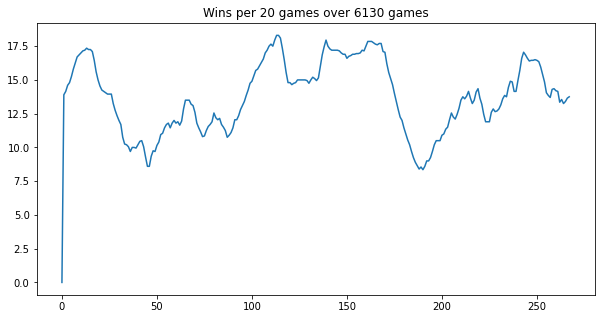

In [784]:
window_size = 20
df = create_df_from_history_ins(30)
display_stats(df, illegal_move_reward = -10)
plot_wins_window(df=df, window=window_size)

# Ran overnight

In [ ]:
df = create_df_from_history_ins(31)
display_stats(df, illegal_move_reward = -10)
plot_wins_window(df=df, window=window_size)

FileNotFoundError: [Errno 2] No such file or directory: '../history/31_history.pkl'

# Implemented change of start player
Took a long time :)

In [785]:
# df = create_df_from_history_ins(32)

FILE_PATH = f"{32}_history.pkl"
history_path = os.path.join(HISTORY_DIR, FILE_PATH)
history = None
with open(history_path, "rb") as f:    
    history = pickle.load(f)

pop_num = len(history['opponent_policy']) - len(history['winner']) 

for i in range(pop_num):
    history['opponent_policy'].pop(0)

for key in history.keys():
    print(key, len(history[key]))

player_1_reward 9860
winner 9860
done_type 9860
final_state 9860
game_length 9860
opponent_policy 9860
loss 9860
start_player 9860


In [786]:
df = pd.DataFrame.from_dict(history)
display_stats(df, illegal_move_reward = -10)

Winner stats:
1    5522
2    2884
0    1454
Name: winner, dtype: int64

Done type stats:
vertical        6988
illegal_move    1454
horizontal      1013
diagonal         405
Name: done_type, dtype: int64

Win percent:
0.56

Win percent without illegal moves:
0.657

Number of illegal moves by Player 1:
697 = 47.9% = 0.147 of total endings

Vertical wins:
4665 = 0.845%



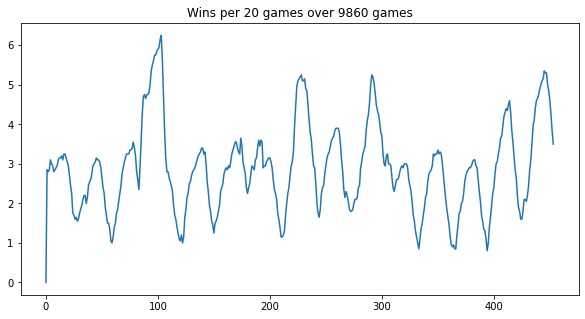

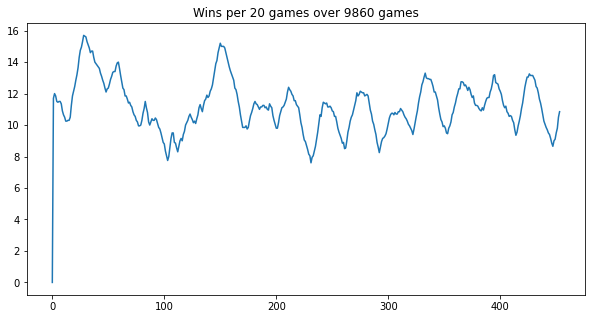

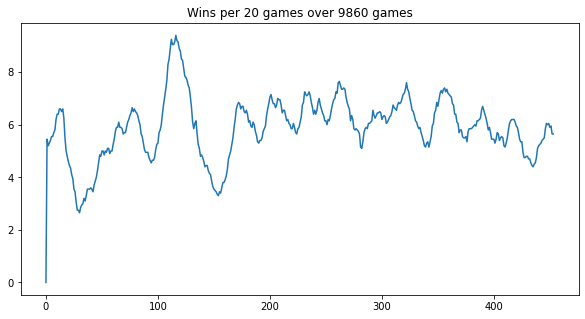

In [787]:
plot_wins_window(df=df, window=window_size, winner=0)
plot_wins_window(df=df, window=window_size, winner=1)
plot_wins_window(df=df, window=window_size, winner=2)

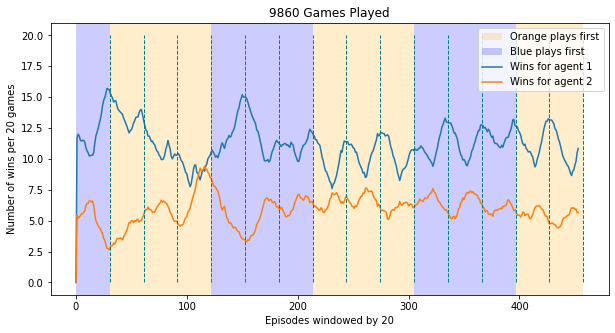

In [788]:
n_episodes = 610
opponent_lag = 2
change_epochs = 3
window_size = 20


epochs = len(df) // n_episodes
n_policy_changes = (epochs // opponent_lag)
epoch_list = np.array([i * n_episodes for i in range(1, epochs)])
policy_changes = np.array([n_episodes * opponent_lag * i for i in range(1, n_policy_changes + 1)])
epoch_list_windowed = epoch_list / window_size
policy_changes_windowed = policy_changes / window_size

opponent_start_ranges = [(i, i) for i in epoch_list_windowed]

# wins_0 = calculate_wins_window(df, window=window_size, winner=0)
wins_1 = calculate_wins_window(df, window=window_size, winner=1)
wins_2 = calculate_wins_window(df, window=window_size, winner=2)

plt.figure(figsize=(10,5))
# plt.title(f"Number of wins per 20 games of training agent (A1), playing alternating as starting- and second player.\n{len(df)} games played")
plt.title(f"{len(df)} Games Played")
plt.axvspan(0, epoch_list_windowed[0], facecolor='blue', alpha=0.2)
plt.axvspan(epoch_list_windowed[0], epoch_list_windowed[3], facecolor='orange', alpha=0.2, label='Orange plays first')
plt.axvspan(epoch_list_windowed[3], epoch_list_windowed[6], facecolor='blue', alpha=0.2, label="Blue plays first")
plt.axvspan(epoch_list_windowed[6], epoch_list_windowed[9], facecolor='orange', alpha=0.2)
plt.axvspan(epoch_list_windowed[9], epoch_list_windowed[12], facecolor='blue', alpha=0.2)
plt.axvspan(epoch_list_windowed[12], epoch_list_windowed[14], facecolor='orange', alpha=0.2)
plt.plot(wins_1, label='Wins for agent 1')
plt.plot(wins_2, label='Wins for agent 2')
plt.legend()
plt.vlines(x=epoch_list_windowed, ymin=[0], ymax=[window_size], colors='teal', ls='--', lw=1, label='vline_multiple - partial height')
plt.xlabel('Episodes windowed by 20')
plt.ylabel('Number of wins per 20 games')
# plt.vlines(x=policy_changes_windowed, ymin=[0], ymax=[window_size], colors='orange', ls='--', lw=2, label='vline_multiple - partial height')
plt.show()


In [789]:
df2 = df.drop(columns=['final_state', 'loss'])
df2[(df2['start_player'] == 1) & (df2['winner'] == 1)]

,player_1_reward,winner,done_type,game_length,opponent_policy,start_player
1,3.0,1,horizontal,5,../checkpoints/main_22_00,1
6,3.0,1,horizontal,7,../checkpoints/main_22_00,1
11,0.5,1,vertical,8,../checkpoints/main_22_00,1
12,0.5,1,vertical,3,../checkpoints/main_22_00,1
13,3.0,1,diagonal,8,../checkpoints/main_22_00,1
...,...,...,...,...,...,...
8634,0.5,1,vertical,3,None,1
8636,0.5,1,vertical,3,None,1
8637,0.5,1,vertical,7,None,1
8638,0.5,1,vertical,3,None,1


Test against a random agent

dict_keys(['player_1_reward', 'winner', 'done_type', 'final_state', 'game_length', 'opponent_policy', 'loss', 'start_player'])
1000 1000 1000 1000
Winner stats:
1    749
0    165
2     86
Name: winner, dtype: int64

Done type stats:
vertical        770
illegal_move    165
horizontal       62
diagonal          3
Name: done_type, dtype: int64

Win percent:
0.749

Win percent without illegal moves:
0.897

Number of illegal moves by Player 1:
5 = 3.0% = 0.165 of total endings

Vertical wins:
749 = 1.0%



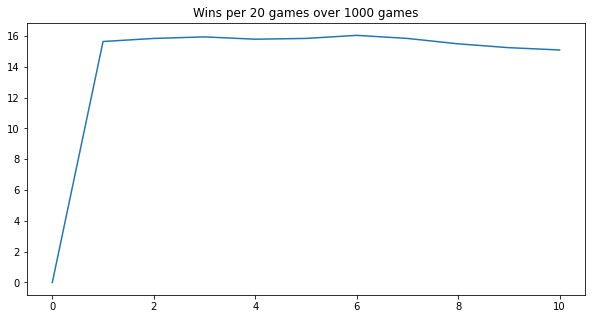

In [790]:
df = create_df_from_history_ins(33)
display_stats(df, illegal_move_reward = -10)
plot_wins_window(df=df, window=window_size)


# Keep training the agent

dict_keys(['player_1_reward', 'winner', 'done_type', 'final_state', 'game_length', 'opponent_policy', 'loss', 'start_player'])
35471 35471 35471 35471
Winner stats:
1    25799
2     7264
0     2408
Name: winner, dtype: int64

Done type stats:
vertical        31435
illegal_move     2408
horizontal       1188
diagonal          440
Name: done_type, dtype: int64

Win percent:
0.727

Win percent without illegal moves:
0.78

Number of illegal moves by Player 1:
1196 = 49.7% = 0.068 of total endings

Vertical wins:
24851 = 0.963%



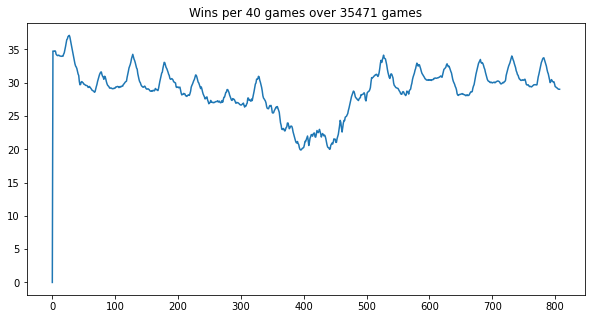

In [791]:
window_size = 40
df = create_df_from_history_ins(34)
display_stats(df, illegal_move_reward = -10)
plot_wins_window(df=df, window=window_size)


dict_keys(['player_1_reward', 'winner', 'done_type', 'final_state', 'game_length', 'opponent_policy', 'loss', 'start_player'])
1000 1000 1000 1000
Winner stats:
1    730
0    159
2    111
Name: winner, dtype: int64

Done type stats:
vertical        752
illegal_move    159
horizontal       86
diagonal          3
Name: done_type, dtype: int64

Win percent:
0.73

Win percent without illegal moves:
0.868

Number of illegal moves by Player 1:
42 = 26.400000000000002% = 0.159 of total endings

Vertical wins:
730 = 1.0%



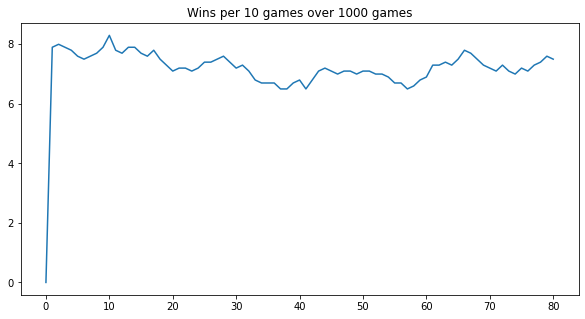

In [792]:
window_size = 10
df = create_df_from_history_ins(35)
display_stats(df, illegal_move_reward = -10)
plot_wins_window(df=df, window=window_size)
